# CIFAR-10

In [12]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

In [13]:
#60 000 * 32 *32 *3
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [14]:
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_train.shape[0],X_test.shape[0])

(50000, 32, 32, 3)
50000 10000


In [16]:
Y_train = np_utils.to_categorical(y_train,NB_CLASSES)
Y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [25]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
score = model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('test score:',score[0])
print('test accuracy:',score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 5s 136us/step - loss: 1.8258 - acc: 0.3659 - val_loss: 1.4173 - val_acc: 0.4959
Epoch 2/20
40000/40000 [==============================] - 5s 124us/step - loss: 1.4042 - acc: 0.5017 - val_loss: 1.3668 - val_acc: 0.5110
Epoch 3/20
40000/40000 [==============================] - 5s 123us/step - loss: 1.2731 - acc: 0.5501 - val_loss: 1.2416 - val_acc: 0.5648
Epoch 4/20
40000/40000 [==============================] - 5s 124us/step - loss: 1.1838 - acc: 0.5813 - val_loss: 1.1094 - val_acc: 0.6169
Epoch 5/20
40000/40000 [==============================] - 5s 124us/step - loss: 1.1087 - acc: 0.6105 - val_loss: 1.1828 - val_acc: 0.5844
Epoch 6/20
40000/40000 [==============================] - 5s 124us/step - loss: 1.0560 - acc: 0.6282 - val_loss: 1.0893 - val_acc: 0.6291
Epoch 7/20
40000/40000 [==============================] - 5s 123us/step - loss: 0.9998 - acc: 0.6523 - val_loss: 1.0821 - 

In [26]:
# define the function
import matplotlib.pyplot as plt
%matplotlib inline
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']

    # make a figure
    fig = plt.figure(figsize=(12,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

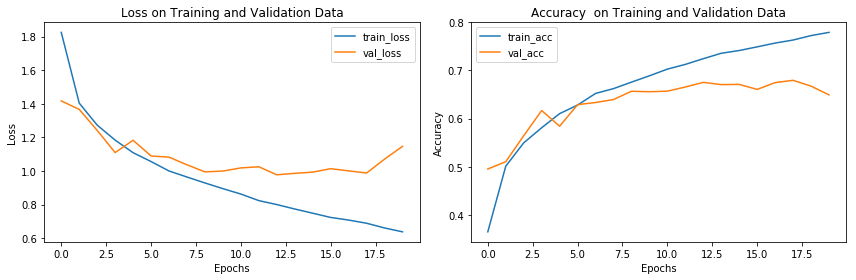

In [27]:
training_vis(history)

## 更深的网络

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [15]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH*2,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
score = model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('test score:',score[0])
print('test accuracy:',score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 11s 276us/step - loss: 1.7675 - acc: 0.3606 - val_loss: 1.3964 - val_acc: 0.4923
Epoch 2/40
40000/40000 [==============================] - 10s 255us/step - loss: 1.3497 - acc: 0.5178 - val_loss: 1.3145 - val_acc: 0.5527
Epoch 3/40
40000/40000 [==============================] - 10s 256us/step - loss: 1.1457 - acc: 0.5945 - val_loss: 0.9876 - val_acc: 0.6520
Epoch 4/40
40000/40000 [==============================] - 10s 256us/step - loss: 1.0019 - acc: 0.6481 - val_loss: 0.9275 - val_acc: 0.6712
Epoch 5/40
40000/40000 [==============================] - 10s 257us/step - loss: 0.8998 - acc: 0.6871 - val_loss: 1.0267 - val_acc: 0.6403
Epoch 6/40
40000/40000 [==============================] - 10s 257us/step - loss: 0.8218 - acc: 0.7131 - val_loss: 0.7787 - val_acc: 0.7326
Epoch 7/40
40000/40000 [==============================] - 10s 256us/step - loss: 0.7635 - acc: 0.7333 - val_loss: 0.

## data augment

In [16]:
from keras.preprocessing.image import ImageDataGenerator
NUM_TO_AUGMENT = 5

In [17]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [ ]:
###
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
xtas,ytas=[],[]
for i in range(X_train.shape[0]):
    num_aug = 0
    x = X_train[i]
    x = x.reshape((1,) + x.shape)
    for x_aug in datagen.flow(x,batch_size=1,save_to_dir='preview',save_prefix='cifar',save_format='jpeg'):
        if num_aug>=NUM_TO_AUGMENT:
            break
        xtas.append(x_aug[0])
        num_aug+=1

In [19]:
datagen.fit(X_train)

In [20]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=BATCH_SIZE),samples_per_epoch=X_train.shape[0],epochs=NB_EPOCH,verbose=VERBOSE)
print("Test score:",score[0])
print("Test accuracy:",score[1])

Epoch 1/20
  2/390 [..............................] - ETA: 28s - loss: 11.6478 - acc: 0.2773

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=20)`
  if __name__ == '__main__':


390/390 [==============================] - 20s 51ms/step - loss: 12.7817 - acc: 0.2066
Epoch 2/20
390/390 [==============================] - 20s 51ms/step - loss: 14.1703 - acc: 0.1208
Epoch 3/20
390/390 [==============================] - 20s 51ms/step - loss: 14.2108 - acc: 0.11830s - loss: 14.2091 - acc: 0.11
Epoch 4/20
390/390 [==============================] - 20s 51ms/step - loss: 14.3186 - acc: 0.1116
Epoch 5/20
390/390 [==============================] - 20s 51ms/step - loss: 14.2786 - acc: 0.1141
Epoch 6/20
390/390 [==============================] - 20s 51ms/step - loss: 14.3634 - acc: 0.1088
Epoch 7/20
390/390 [==============================] - 20s 52ms/step - loss: 14.4703 - acc: 0.1022
Epoch 8/20
390/390 [==============================] - 20s 51ms/step - loss: 14.4891 - acc: 0.1010
Epoch 9/20
390/390 [==============================] - 20s 51ms/step - loss: 14.4890 - acc: 0.1011
Epoch 10/20
390/390 [==============================] - 20s 51ms/step - loss: 14.4984 - acc: 0.1005


In [21]:
model.save('cifar.h5')

In [1]:
from keras.models import load_model
import numpy as np
import scipy.misc
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
model = load_model('cifar.h5')

In [30]:
predictions=model.predict_classes(X_test)

In [31]:
predictions

array([3, 8, 8, ..., 5, 4, 7])

In [33]:
import pandas as pd
pd.crosstab(y_test.reshape(-1),predictions,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,679,17,84,33,21,4,46,26,44,46
1,22,738,22,16,6,4,48,12,16,116
2,63,2,454,65,116,40,200,52,3,5
3,15,4,57,492,70,88,229,35,4,6
4,13,2,52,70,593,11,190,63,5,1
5,5,1,65,254,70,387,144,69,3,2
6,2,1,18,27,12,4,930,5,1,0
7,11,1,26,64,75,32,46,742,0,3
8,87,45,25,42,20,8,45,9,665,54
